In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path


def read_image(img_or_path):
    if isinstance(img_or_path, (str, Path)):
        img = cv2.imread(str(img_or_path), cv2.IMREAD_UNCHANGED)
        if img is None:
            raise FileNotFoundError(f"Cannot read image: {img_or_path}")
        return img
    return np.array(img_or_path)


In [5]:
import matplotlib.pyplot as plt
import cv2


def show_image(img, title="Image"):

    if img.ndim == 3:
        # convert BGR (OpenCV) → RGB for correct colors
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
    plt.title(title)
    plt.axis("off")
    plt.show()

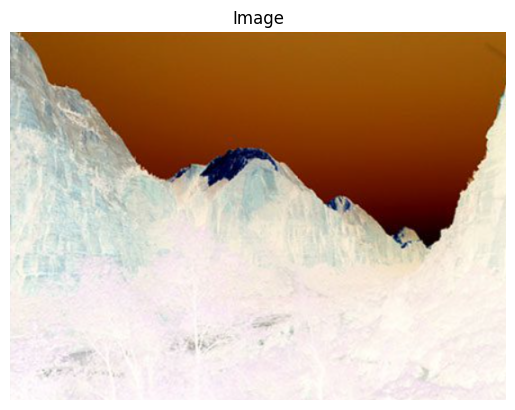

In [6]:
def image_negative(img_or_path):

    img = read_image(img_or_path)

    if img.dtype == np.uint8:
        out = 255 - img
    else:
        img = img.astype(np.float32)
        if img.max() > 1.5:
            img = img / 255.0
        out = 1.0 - img

    return out


result = image_negative("lab_images/1.png")
show_image(result)

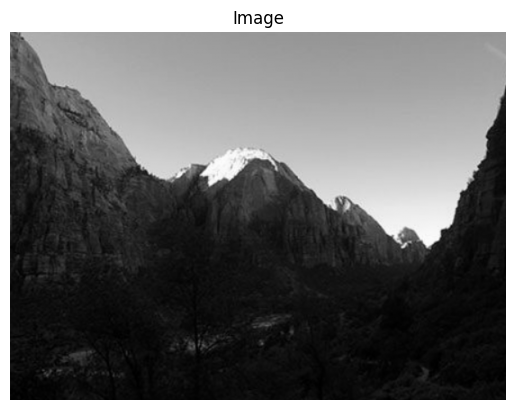

In [7]:
def to_grayscale(img_or_path):

    img = read_image(img_or_path)

    if img.ndim == 2:
        return img

    if img.shape[2] == 3:
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if img.shape[2] == 4:
        return cv2.cvtColor(img[:, :, :3], cv2.COLOR_BGR2GRAY)

    raise ValueError("Unsupported image format")

result = to_grayscale("lab_images/1.png")
show_image(result)

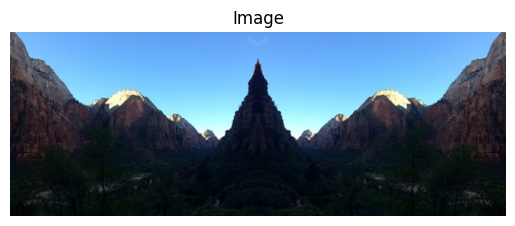

In [8]:
def mirror_image(img_or_path):

    img = read_image(img_or_path)

    flipped = np.fliplr(img)
    out = np.concatenate((img, flipped), axis=1)

    return out


result = mirror_image("lab_images/1.png")
show_image(result)

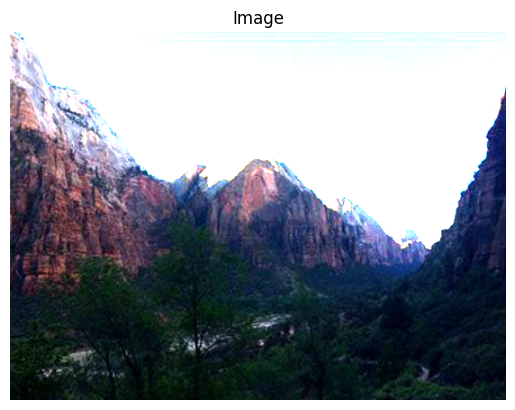

In [10]:
def gamma_non_normalized(img_or_path, gamma):

    img = read_image(img_or_path)
    img = img.astype(np.float32)

    out = np.power(img, gamma)
    out = np.clip(out, 0, 255).astype(np.uint8)

    return out


result = gamma_non_normalized("lab_images/1.png", gamma=1.2)
show_image(result)

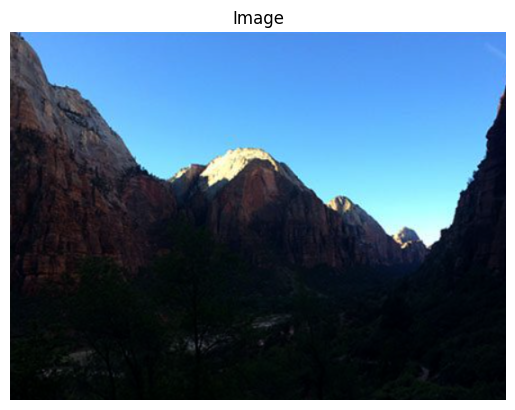

In [11]:
def gamma_normalized(img_or_path, gamma):

    img = read_image(img_or_path)
    img = img.astype(np.float32)

    if img.max() > 1.5:
        img = img / 255.0

    out = np.power(img, gamma)

    return out

result = gamma_normalized("lab_images/1.png", gamma=1.2)
show_image(result)

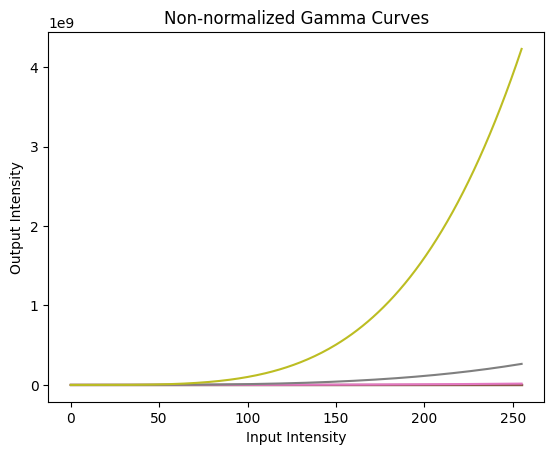

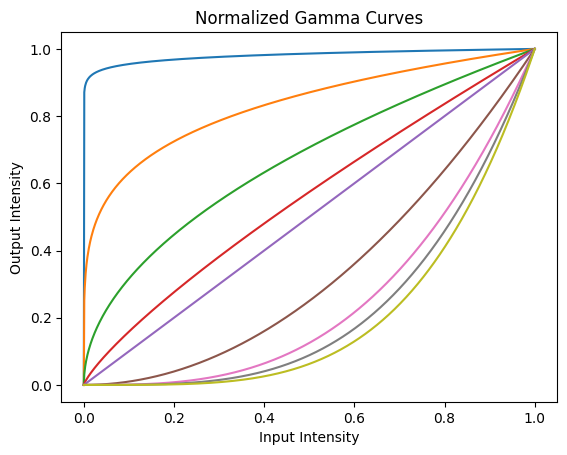

In [12]:
def plot_gamma_curves():

    gammas = [0.02, 0.2, 0.5, 0.8, 1, 2, 3, 3.5, 4]

    # Non-normalized
    x1 = np.arange(0, 256)

    plt.figure()
    for g in gammas:
        y = np.power(x1, g)
        plt.plot(x1, y)
    plt.title("Non-normalized Gamma Curves")
    plt.xlabel("Input Intensity")
    plt.ylabel("Output Intensity")
    plt.show()

    # Normalized
    x2 = np.arange(0, 1.001, 0.001)

    plt.figure()
    for g in gammas:
        y = np.power(x2, g)
        plt.plot(x2, y)
    plt.title("Normalized Gamma Curves")
    plt.xlabel("Input Intensity")
    plt.ylabel("Output Intensity")
    plt.show()


plot_gamma_curves()

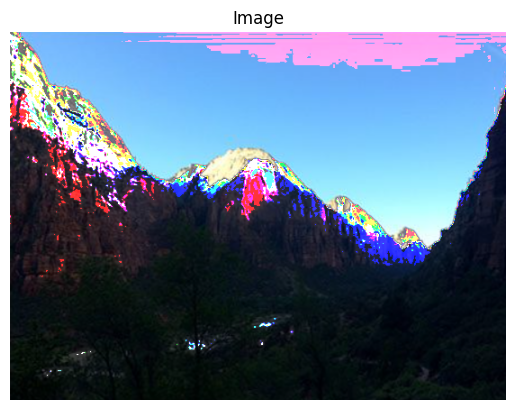

In [15]:
def set_range_to_max(img_or_path, A, B):

    img = read_image(img_or_path)
    img = img.copy()

    if img.dtype != np.uint8:
        img = img.astype(np.uint8)

    mask = (img >= A) & (img <= B)
    img[mask] = 255

    return img


result = set_range_to_max("lab_images/1.png", A=66, B=100)
show_image(result)

In [ ]:
def apply_negative_to_folder(folder_path):

    folder = Path(folder_path)

    for file in folder.iterdir():
        if file.suffix.lower() in [".png", ".jpg", ".jpeg", ".bmp"]:
            img = image_negative(file)
            cv2.imwrite(str(folder / f"negative_{file.name}"), img)



In [17]:
def bitget(img_or_path, bit_position):
    if not (1 <= int(bit_position) <= 8):
        raise ValueError("bit_position must be in range 1..8")

    img = read_image(img_or_path)

    # ensure grayscale
    if img.ndim == 3:
        if img.shape[2] == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        elif img.shape[2] == 4:
            img = cv2.cvtColor(img[:, :, :3], cv2.COLOR_BGR2GRAY)
        else:
            raise ValueError("Unsupported image format")

    if img.dtype != np.uint8:
        img = np.clip(img, 0, 255).astype(np.uint8)

    shifted = np.right_shift(img, bit_position - 1)
    plane = np.bitwise_and(shifted, 1)


    out = (plane * 255).astype(np.uint8)
    return out

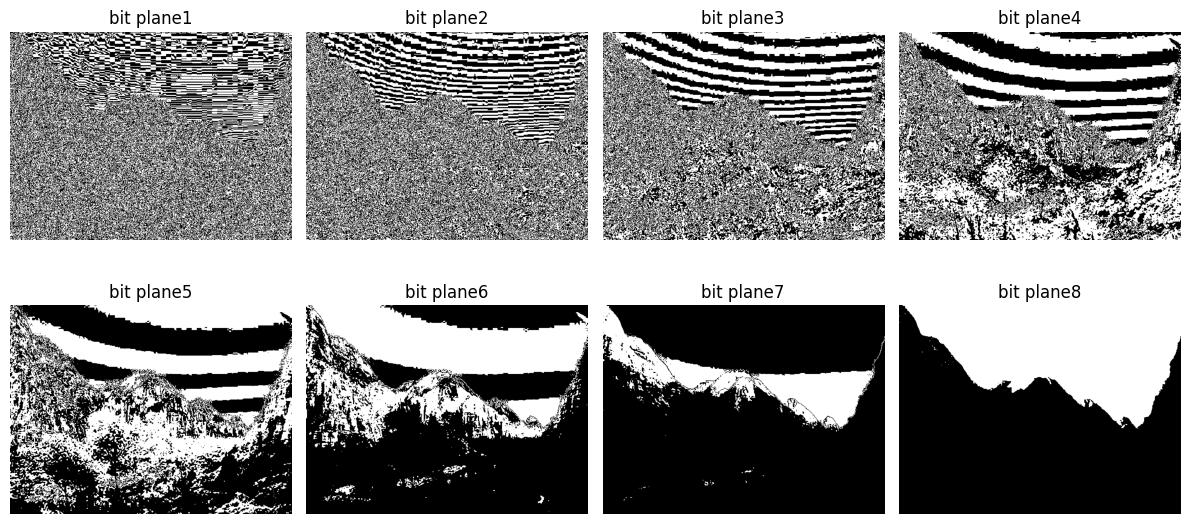

In [ ]:
def displayBitResponse(img_or_path):
    img = read_image(img_or_path)

    if img.ndim == 3:
        if img.shape[2] == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        elif img.shape[2] == 4:
            img = cv2.cvtColor(img[:, :, :3], cv2.COLOR_BGR2GRAY)
        else:
            raise ValueError("Unsupported image format")

    if img.dtype != np.uint8:
        img = np.clip(img, 0, 255).astype(np.uint8)

    plt.figure(figsize=(12, 6))

    for b in range(1, 9):
        plane_img = bitget(img, b)

        plt.subplot(2, 4, b)
        plt.imshow(plane_img, cmap="gray", vmin=0, vmax=255)
        plt.title(f"bit plane{b}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


displayBitResponse("lab_images/1.png")